In [ ]:
ACTIVIDAD 2b -Mamdani- (opcional - puntuación extra)
Le proponen automatizar el trabajo de un calderista. Sus variables son la temperatura exterior (exterior a la caldera, es decir, la temperatura de las habitaciones del edificio), la temperatura interior (de la caldera) y el tamaño de la llama.
Cuando la temperatura exterior es baja, la combustión debe ser alta. Cuando la temperatura exterior es media, la combustión debe ser moderada. Cuando la temperatura exterior es alta, la combustión debe estar en piloto.
Cuando la temperatura interior sea alta, la combustión debe limitarse ligeramente. Cuando la temperatura interior sea crítica, la combustión debe ser reducida. Si la temperatura interior no es alta o crítica, no debería interesarnos.
Explicite las reglas que ha elegido para esta tarea, y de ejemplos de valores de entrada y salida.

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=39936292f3f3a74b333f0d93930dbbf7f20352b21f59f5c0a3436dab82cdc009
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz


In [ ]:
# Definir universos de entrada y salida
x = np.arange(0, 100, 1)
y = np.arange(0, 120, 1)

In [ ]:

#variables entrada temperatura exterior, temperatura interior, tamanio llama.

# temperatura ext baja ------------> combustion alta
# temperatura ext media ---------> combustion moderada
# temperatura ext alta ---------> combustion en piloto

#temperatura interior alta ------------> combustion debe limitarse ligermanete
#temperatura interior critica -------> combustion debe ser reducida
#Si la temperatura interior no es alta o crítica -----> no debería interesarnos. ?? no haria nada para que marcarlo?


# Definir las funciones de pertenencia para las variables de entrada

temperaturaext_baja = fuzz.trapmf(x, [0, 15, 30, 45])
temperaturaext_media = fuzz.trapmf(x, [30, 45, 60, 75])
temperaturaext_alta = fuzz.trapmf(x, [60,75, 90, 105])

#temperaturaint_baja = fuzz.trapmf(x, [0, 0, 30, 50])
temperaturaint_alta =  fuzz.trapmf(x, [30, 45, 60, 75])
temperaturaint_critica= fuzz.trapmf(x, [60,75, 90, 105])


#funciones pertenencia salida
combustion_piloto = fuzz.trapmf(y,[0, 20, 30, 40])
combustion_moderada = fuzz.trapmf(y, [30,40, 50, 60])
combustion_alta = fuzz.trapmf(y, [60, 70, 80, 90])

combustion_limitada = fuzz.trapmf(y, [40, 55, 65, 80])
combustion_reducida = fuzz.trapmf(y, [65,90 ,100 ,110])
#combustion no interesada????




In [ ]:
#definir variables de entrada para probar
x1 = 20 # temp exterior
x2 = 80    # temp interior
salida_centroide = []

In [ ]:
#funciones pertenencia
temperaturaext_level_baja = fuzz.interp_membership(x, temperaturaext_baja, x1)
temperaturaext_level_media = fuzz.interp_membership(x, temperaturaext_media, x1)
temperaturaext_level_alta = fuzz.interp_membership(x, temperaturaext_alta, x1)


temperaturaint_level_alta =  fuzz.interp_membership(x, temperaturaint_alta, x2)
temperaturaint_level_critica= fuzz.interp_membership(x, temperaturaint_critica, x2)

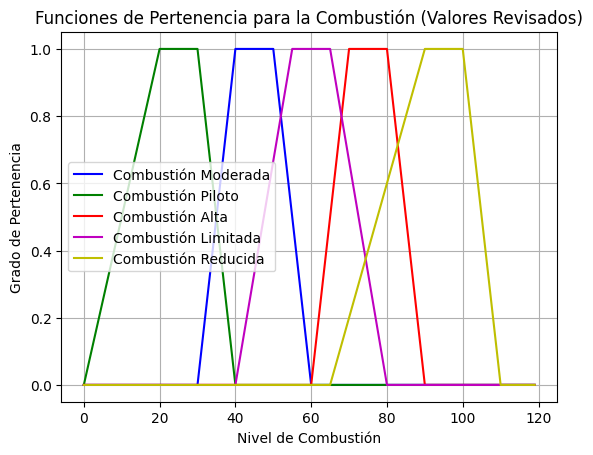

In [ ]:
# Visualización de las funciones de pertenencia (solo grafique las de salida)
plt.figure()

plt.plot(y, combustion_moderada, 'b', linewidth=1.5, label='Combustión Moderada')
plt.plot(y, combustion_piloto, 'g', linewidth=1.5, label='Combustión Piloto')
plt.plot(y, combustion_alta, 'r', linewidth=1.5, label='Combustión Alta')
plt.plot(y, combustion_limitada, 'm', linewidth=1.5, label='Combustión Limitada')
plt.plot(y, combustion_reducida, 'y', linewidth=1.5, label='Combustión Reducida')

plt.title('Funciones de Pertenencia para la Combustión (Valores Revisados)')
plt.xlabel('Nivel de Combustión')
plt.ylabel('Grado de Pertenencia')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Aplicar reglas difusas
combustion_implicacion_alta  = np.fmin(temperaturaext_level_baja,combustion_alta)
combustion_implicacion_moderada =  np.fmin(temperaturaext_level_media,combustion_moderada)
combustion_implicacion_piloto =  np.fmin(temperaturaext_level_alta,combustion_piloto)
combustion_implicacion_limitarse =  np.fmin(temperaturaint_level_alta,combustion_limitada)
combustion_implicacion_reducida =  np.fmin(temperaturaint_level_critica,combustion_reducida)



In [ ]:
# Combina todas las implicaciones usando np.fmax()
combustion_agregada = np.fmax.reduce([combustion_implicacion_alta,
                                      combustion_implicacion_moderada,
                                      combustion_implicacion_piloto,
                                      combustion_implicacion_limitarse,
                                      combustion_implicacion_reducida])

In [ ]:
# Calcular el centroide (defuzzifica)
centroide = fuzz.defuzz(y, combustion_agregada, 'centroid')
salida_centroide.append(centroide)

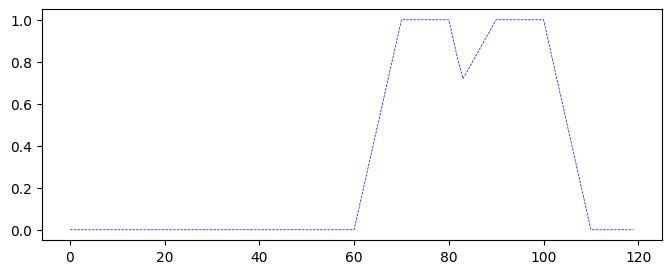

In [ ]:
#GRAFICOS del resultado final:

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(y,combustion_agregada,'b', linewidth=0.5, linestyle='--')